In [30]:
import numpy as np
import os
from os import path
import matplotlib.pyplot as plt
# Use scipy.misc.imread because we want to be able to specify mode='RGBA'
# TODO: Investigate deprecation warning
import scipy.misc

from EightBitTemplateMatcher import imageTo8BitColor

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [126]:
def loadChunks( path_to_chunks_dir, col_postfix = '_col', pri_postfix = '_pri', include_filenames=False ):
    all_chunk_files = os.listdir( path_to_chunks_dir )
    all_chunk_files.sort()

    chunk_filenames = list(
        filter(
            lambda filename: (
                col_postfix not in filename and
                pri_postfix not in filename
            ), all_chunk_files
        )
    )

    # Get one block so we know the size for our numpy arr. Assume all blocks are the same size
    sample_image = scipy.misc.imread( path.join( path_to_chunks_dir, chunk_filenames[ 0 ] ), mode='RGBA' )
    # ( samples, (image, collision map), w, h )
    chunks = np.zeros( ( len( chunk_filenames ), 2, sample_image.shape[ 0 ], sample_image.shape[ 1 ] ) )

    for i, chunk_filename in enumerate( chunk_filenames ):
        chunk_filename = path.join( path_to_chunks_dir, chunk_filename )
        col_filename = path.splitext( chunk_filename )[ 0 ] + col_postfix + path.splitext( chunk_filename )[ 1 ]

        chunk_image = scipy.misc.imread( chunk_filename, mode='RGBA' )
        chunk_image = imageTo8BitColor( chunk_image )[ 0 ]
        chunks[ i, 0, :, : ] = chunk_image

        col_image = scipy.misc.imread( col_filename, mode='RGBA' )
        col_image_flattened = np.logical_not( # Where not pink
            np.logical_and(
                col_image[ :, :, 0 ] == 255, 
                col_image[ :, :, 1 ] == 0, 
                col_image[ :, :, 2 ] == 255 
            ) 
        ) * 255
        chunks[ i, 1, :, : ] = col_image_flattened

    if include_filenames:
        return chunks, chunk_filenames
    return chunks

chunks, chunk_filenames = loadChunks( 'data/Green Hill Zone Act 1/chunks/', include_filenames=True )
print( chunks.shape )

/Users/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
/Users/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(83, 2, 256, 256)


53.png


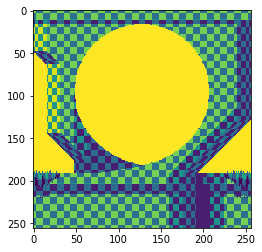

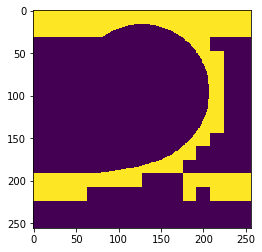

In [129]:
image_idx = 49 # Loop
# image_idx = np.random.randint( chunks.shape[ 0 ] )
print( chunk_filenames[ image_idx ] )
plt.imshow( chunks[ image_idx, 0, :, : ] )
plt.subplots()
plt.imshow( chunks[ image_idx, 1, :, : ] )

In [100]:
random_image_idx

49